# Prerequisites

- Install the [Cognite Python SDK](https://github.com/cognitedata/cognite-sdk-python)
- Make sure that you have received an API key from http://openindustrialdata.com/ 
- Set the API key as an environment variable, see instructions in the Cognite Python SDK [github repository](https://github.com/cognitedata/cognite-sdk-python)

# Get started

First, we make the imports we'll need for this mini-intro

In [1]:
%pylab notebook
import numpy as np
import pandas as pd
import os

from datetime import datetime

from cognite.client import CogniteClient

# register matplotlib onverter to avoid warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Populating the interactive namespace from numpy and matplotlib


# The API key is needed to authenticate
Use your API key to authenticate. Make sure that you have first set the API key as an environment variable.

Your API key is specific to a project. Now we will work with the data as part of the Open Industrial Data. The project is then called "publicdata"

In [2]:
client = CogniteClient(api_key=os.environ['PUBLICDATA_API_KEY'])

# Data in the Cognite Data Platform is structured around assets

The data in the Cognite Data Platform is structured by assets, where an asset can be a specific piece of equipment or an equipment type. 

We'll get all assets with get_assets(). You can also include a description or asset name as a parameter -- see more information in the reference docs.


In [3]:
assets = client.assets.get_assets()
assets

The API returns response objects. We have added a .to_pandas() method in the Python SDK which makes it easier to view the data.

In [4]:
assets_df = assets.to_pandas()
assets_df

,createdTime,depth,description,id,lastUpdatedTime,metadata,name,parentId,path
0,0,2,GAS COMPRESSION AND RE-INJECTION (PH),3111454725058294,0,"{'SOURCE_DB': 'workmate', 'SOURCE_TABLE': 'wma...",23,4650652196144007,"[6687602007296940, 4650652196144007, 311145472..."
1,0,7,1ST STAGE COMP DRY GAS SEAL SYS ON PH,3904753668320840,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-1ST STAGE COMP DRY GAS SEAL SYS-PH,4856008121737468,"[6687602007296940, 4650652196144007, 311145472..."
2,0,7,1ST STAGE COMP ENCLOSURE ON PH,2499711953216311,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-1ST STAGE COMP ENCLOSURE-PH,4856008121737468,"[6687602007296940, 4650652196144007, 311145472..."
3,0,7,1ST STAGE COMP LUBE OIL SYS ON PH,2137557577165478,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-1ST STAGE COMP LUBE OIL SYS-PH,4856008121737468,"[6687602007296940, 4650652196144007, 311145472..."
4,0,4,1ST STAGE COMPRESSION ON PH,4518112062673878,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-1ST STAGE COMPRESSION-PH,6895991969886325,"[6687602007296940, 4650652196144007, 311145472..."
5,0,5,1ST STAGE COMPRESSOR ON PH,7372310232665628,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-1ST STAGE COMPRESSOR-PH,4518112062673878,"[6687602007296940, 4650652196144007, 311145472..."
6,0,7,2ND STAGE COMP DRY GAS SEAL SYS ON PH,6658342189327214,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-2ND STAGE COMP DRY GAS SEAL SYS-PH,4222791488928479,"[6687602007296940, 4650652196144007, 311145472..."
7,0,4,2ND STAGE COMPRESSION ON PH,5786472304680477,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-2ND STAGE COMPRESSION-PH,6895991969886325,"[6687602007296940, 4650652196144007, 311145472..."
8,0,5,2ND STAGE COMPRESSOR ON PH,4074033093163622,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-2ND STAGE COMPRESSOR-PH,5786472304680477,"[6687602007296940, 4650652196144007, 311145472..."
9,0,6,VRD - PH 1STSTGSUCT SCRUB INLET,1145062594143414,0,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531669', ...",23-AE-92527-S1,53231887945301,"[6687602007296940, 4650652196144007, 311145472..."


Looking in the table, we see that assets have names, descriptions, metadata, and an own ID. This ID is generated by Cognite and unique for each asset.

But what now? That is a big table and it is hard to know what we are looking at.

# How to explore data

In order to explore the data, you can:
1. Use what you know about the physical system to immediately fetch the relevant data 
2. Navigate the asset hiearchy


## 1. When you the physical system you can immediately zoom in on the relevant data
Looking at the diagram on (TODO: CREATE LINK WITH DIAGRAM), we might want to investigate the scrubber further.


The following P&IDs are uploaded to the Cognite Data Platform.

- PH-25578-P-4110006-001: 1st stage lube oil
- PH-25578-P-4110010-001: 1 st stage dry gas seal
- PH-25578-P-4110119-001: stage 1 - P & I diagram
- PH-ME-P-0151-001: 1 st stage suction cooler
- PH-ME-P-0152-001: 1 st stage suction scrubber
- PH-ME-P-0153-001: 1 st stage compressor
- PH-ME-P-0156-001: 1 st stage compressor. Temperatur and vibration monitoring
- PH-ME-P-0156-002: 1 st stage compressor. Temperatur and vibration monitoring
- PH-ME-0160-001: 1 st stage discharge cooler 

We can have a look at the PID for the 1st stage suction scrubber.

In [5]:
scrubber_file_name = 'PH-ME-P-0152-001'
client.files.list_files(name=scrubber_file_name).to_pandas()

,createdTime,directory,fileName,fileType,id,lastUpdatedTime,metadata,source,uploaded,uploadedAt
0,1533213439872,/BP Operated Licenses/PL006B Valhall/99 Docume...,PH-ME-P-0152-001,tiff,6292237976899896,1533213483919,"{'area_name': 'PH,INTERMEDIATE DECK COOLER & S...",Documentum,True,1533213483919


In [6]:
# Now download the file using the file id
client.files.download_file(client.files.list_files(name=scrubber_file_name).to_pandas().id[0])

'https://storage.googleapis.com/cognite-storage/5977964818434649/6292237976899896/PH-ME-P-0152-001?GoogleAccessId=tsdb-subscriber@cognitedata.iam.gserviceaccount.com&Expires=1549454939&Signature=ZNoXdsS5fBA5u2Kk6qcHS67MqqQp64eq1PGTb%2F2CMmZGi6OzEbDfbkpFSJKR5ZzDBUS3D79rqMpaks3MMjH1wWXdxztSMgN2MnqkWZR21ho212NqkbMoAXUn2suD%2B6v2HlfzfMLvx1UHgA7ZBNpJwu8kYBavn6wasj2dXh2D2CdiSrxuvKH0akgnTdtXDPUM9gD1UzCYVfAaaOb2r%2FdIHUHtU0wdmZMm8U85N6Po%2FwqKTMx1RllwYmG2e1jMq2LohvRXveaoEPXfzSnYB8hAE%2FcMI228va29OO2okZrmKi1EgruVJj4vxbwr7gZCMwahUa8RleLehyEpiMv8LXARkg%3D%3D'

If you run the code yourself, you will get a new download url which you can use to look at the P&ID in the browser.

Skilled engineers can look at the P&ID and understand how the system works. I asked an engineer and was told that I could look at timeseries for the following: 

- The scrubber level working setpoint (tag name = 'VAL_23-LIC-92521:Control Module:YR')
- The scrubber level measured value (tag name = 'VAL_23-LIC-92521:Z.X.Value')
- The scrubber level output (tag name = 'VAL_23-LIC-92521:Z.Y.Value')

### Specify the data

We can get the relevant data for the scrubber level setpoint, measured value, and output.
 


In [7]:
scrubber_level_working_setpoint = 'VAL_23-LIC-92521:Control Module:YR'
scrubber_level_measured_value  = 'VAL_23-LIC-92521:Z.X.Value'
scrubber_level_output  = 'VAL_23-LIC-92521:Z.Y.Value'
all_ts_names = [scrubber_level_working_setpoint, scrubber_level_measured_value, scrubber_level_output]
print(all_ts_names)

['VAL_23-LIC-92521:Control Module:YR', 'VAL_23-LIC-92521:Z.X.Value', 'VAL_23-LIC-92521:Z.Y.Value']


One way to pull data is using the function get_datapoints_frame. See reference documentation, http://cognite-sdk-python.readthedocs.io/en/latest/cognite.html#module-cognite.v05.timeseries.

This function gets datapoints for given timeseries all on the same timestamps, saving you from otherwise interpolating to get the timeseries data on the same timestamps.

Specifying a start and end time gives you data for the desired time range
Granularity of 1 hour pulls a single aggregate value for all data points per hour
Providing multiple aggregates pulls data using all the three aggregates

In [8]:
start = datetime(2018, 7, 1)
end = '1d-ago'
data = client.datapoints.get_datapoints_frame(all_ts_names, start=start, end=end, granularity='1h', aggregates=['average', 'min', 'max'])

### Investigate the data
The data is returned with the timeseries for the different aggregates in the columns.

In [9]:
data.head()

,timestamp,VAL_23-LIC-92521:Control Module:YR|average,VAL_23-LIC-92521:Control Module:YR|min,VAL_23-LIC-92521:Control Module:YR|max,VAL_23-LIC-92521:Z.X.Value|average,VAL_23-LIC-92521:Z.X.Value|min,VAL_23-LIC-92521:Z.X.Value|max,VAL_23-LIC-92521:Z.Y.Value|average,VAL_23-LIC-92521:Z.Y.Value|min,VAL_23-LIC-92521:Z.Y.Value|max
0,1530403200000,35.0,35.0,35.0,35.127482,34.287022,36.580452,36.225898,32.852486,41.348152
1,1530406800000,35.0,35.0,35.0,34.926104,33.992523,36.231022,35.466413,31.533926,39.901684
2,1530410400000,35.0,35.0,35.0,34.663202,33.580528,36.017395,31.829551,26.072357,38.202591
3,1530414000000,35.0,35.0,35.0,35.144910,34.268711,36.311893,33.104658,29.197401,37.303951
4,1530417600000,35.0,35.0,35.0,35.099385,34.280918,36.099792,33.911751,30.431208,38.298256


Substitute missing values before plotting the data. Pandas has useful functionality for this, e.g. see https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html.

In [10]:
data = data.fillna(method='ffill')

### Visualize the data

<IPython.core.display.Javascript object>


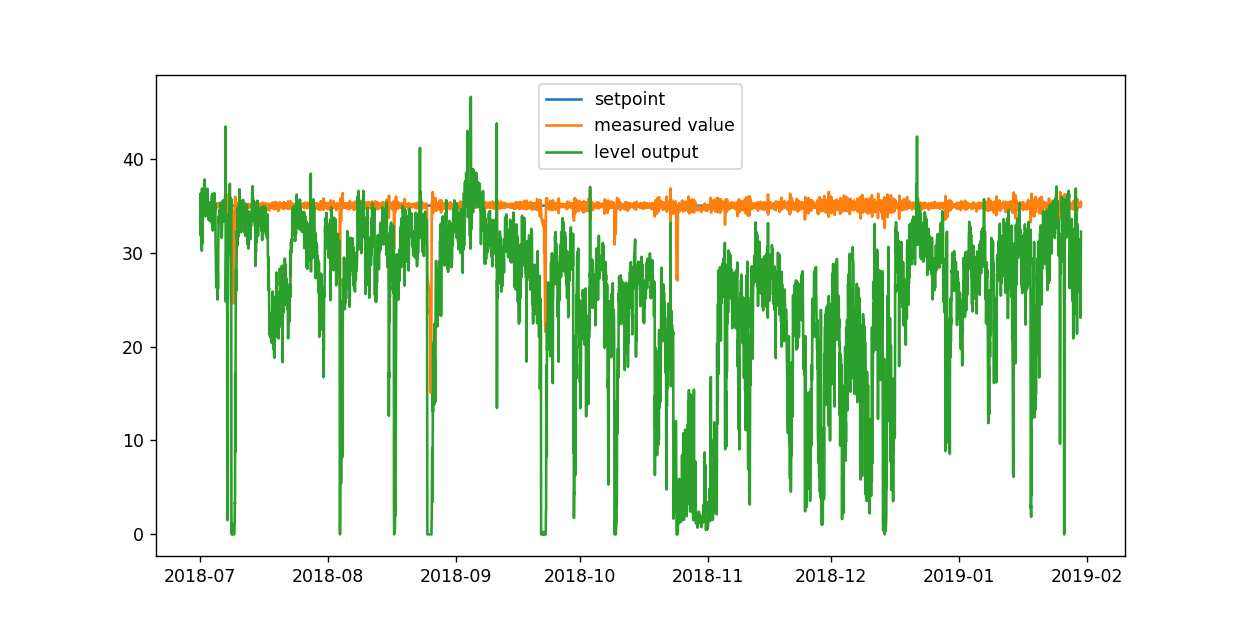

In [11]:
T = pd.to_datetime(data.timestamp, unit='ms')
plt.figure(figsize=(10, 5))
plt.plot(T, data[scrubber_level_working_setpoint+'|average'].values, label='setpoint')
plt.plot(T, data[scrubber_level_measured_value+'|average'].values, label='measured value')
plt.plot(T, data[scrubber_level_output+'|average'].values, label='level output')
plt.legend()
plt.show()

Wooh, you've made a plot! Now what does this data mean?

Background:
- The blue line is the desired level in the scrubber. 
- The orange line is actual, measured value in the scrubber.
- The green line is the output from the scrubber to control the level in the scrubber.

Ideally, the orange line lies on top of the blue line, i.e. the actual measured value is equal to the desired level in the scrubber. The green line can adjust in order to make sure the measured value matches the desired value.

We then see that 


## 2. Navigating the asset hierarchy is useful when you don't know what you're looking at

We can start by navigating up to the root of the asset hierarchy.

In [12]:
# select an asset id from the table above
first_row_asset_id = 3111454725058294
client.assets.get_asset(first_row_asset_id).to_pandas()

,0
id,3111454725058294
depth,2
name,23
parentId,4650652196144007
description,GAS COMPRESSION AND RE-INJECTION (PH)
metadata,"{'SOURCE_DB': 'workmate', 'SOURCE_TABLE': 'wma..."
createdTime,0
lastUpdatedTime,0
path,"[6687602007296940, 4650652196144007, 311145472..."


In [13]:
# look at the parentId
parent_id = 4650652196144007
client.assets.get_asset(parent_id).to_pandas()

,0
id,4650652196144007
depth,1
name,VAL
parentId,6687602007296940
description,Valhall plattform
metadata,"{'SOURCE_DB': 'workmate', 'SOURCE_TABLE': 'wma..."
createdTime,0
lastUpdatedTime,1549454445906
path,"[6687602007296940, 4650652196144007]"


In [14]:
# Cool, we found the Valhall plattform asset! Let's look at the parent of that
parent_id = 6687602007296940
client.assets.get_asset(parent_id).to_pandas()


,0
id,6687602007296940
depth,0
name,Aker BP
description,Aker BP
createdTime,0
lastUpdatedTime,0
path,[6687602007296940]


We navigated all the way up to the AkerBP project! Note, we could also find that node by including description when getting the asset. For example:

In [15]:
client.assets.get_assets(description="Aker BP").to_pandas()

,createdTime,depth,description,id,lastUpdatedTime,metadata,name,parentId,path
0,0,7,SOFT TAG VRD - PH 1STSTGCOMP HOT GAS BP,7162999463409911,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-FC-92542,4.168462e+15,"[6687602007296940, 4650652196144007, 311145472..."
1,0,7,VRD - PH 1STSTGCOMP HOT GAS BP,8498552548209865,0,"{'ELC_STATUS_ID': '1211', 'RES_ID': '616457', ...",23-FPSV-92542,4.168462e+15,"[6687602007296940, 4650652196144007, 311145472..."
2,0,6,VRD - PH 1STSTGCOMP HOT GAS BP,4168462116468060,0,"{'ELC_STATUS_ID': '1211', 'RES_ID': '569424', ...",23-FV-92542,7.372310e+15,"[6687602007296940, 4650652196144007, 311145472..."
3,0,7,VRD - PH 1STSTGCOMP HOT GAS BP,5158186720312624,0,"{'ELC_STATUS_ID': '1225', 'SOURCE_DB': 'workma...",23-FVX-92542,4.168462e+15,"[6687602007296940, 4650652196144007, 311145472..."
4,0,7,VRD - PH 1STSTGCOMP HOT GAS BP,2490849874992278,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-FY-92542-03,4.168462e+15,"[6687602007296940, 4650652196144007, 311145472..."
5,0,7,VRD - PH 1STSTGCOMP HOT GAS BP,8208435951121889,0,"{'ELC_STATUS_ID': '1211', 'RES_ID': '530895', ...",23-FZSH-92542,4.168462e+15,"[6687602007296940, 4650652196144007, 311145472..."
6,0,7,VRD - PH 1STSTGCOMP HOT GAS BP,6037690821722668,0,"{'ELC_STATUS_ID': '1211', 'RES_ID': '530895', ...",23-FZSL-92542,4.168462e+15,"[6687602007296940, 4650652196144007, 311145472..."
7,0,0,Aker BP,6687602007296940,0,NaN,Aker BP,NaN,[6687602007296940]


You can see that the get_assets() query gets the same asset as we found by navigating the asset tree. Now, when we are the top, we can also navigate downward the asset hiearchy.

In [16]:
# Explore the subtree below the root
akerbp_asset_id = 6687602007296940
akerbp_subtree = client.assets.get_asset_subtree(akerbp_asset_id, depth=4)
akerbp_subtree.to_pandas()

,createdTime,depth,description,id,lastUpdatedTime,metadata,name,parentId,path
0,0,0,Aker BP,6687602007296940,0,NaN,Aker BP,NaN,[6687602007296940]
1,0,1,Valhall plattform,4650652196144007,1549454445906,"{'SOURCE_DB': 'workmate', 'SOURCE_TABLE': 'wma...",VAL,6.687602e+15,"[6687602007296940, 4650652196144007]"
2,0,2,GAS COMPRESSION AND RE-INJECTION (PH),3111454725058294,0,"{'SOURCE_DB': 'workmate', 'SOURCE_TABLE': 'wma...",23,4.650652e+15,"[6687602007296940, 4650652196144007, 311145472..."
3,0,3,GAS COMPRESSION AND RE-INJECTION ON PH,6895991969886325,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",230900,3.111455e+15,"[6687602007296940, 4650652196144007, 311145472..."
4,0,4,VRD - PH 1STSTGDISCCOOL COOLMED IN,1150715783816357,0,"{'ELC_STATUS_ID': '1212', 'SOURCE_DB': 'workma...",23-TT-92604B,6.895992e+15,"[6687602007296940, 4650652196144007, 311145472..."
5,0,4,1ST STAGE COMPRESSION ON PH,4518112062673878,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-1ST STAGE COMPRESSION-PH,6.895992e+15,"[6687602007296940, 4650652196144007, 311145472..."
6,0,4,2ND STAGE COMPRESSION ON PH,5786472304680477,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-2ND STAGE COMPRESSION-PH,6.895992e+15,"[6687602007296940, 4650652196144007, 311145472..."


Can you spot which assets have which parents in the table above?

## Congrats, you've gotten started using the Cognite Data Platform! What's next?

You can find ideas for what to model or explore on http://openindustrialdata.com/.

